In [1]:
!pip install ultralytics
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.2/915.2 kB 42.7 MB/s eta 0:00:00
Wed Feb 19 12:33:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   29C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                

In [2]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


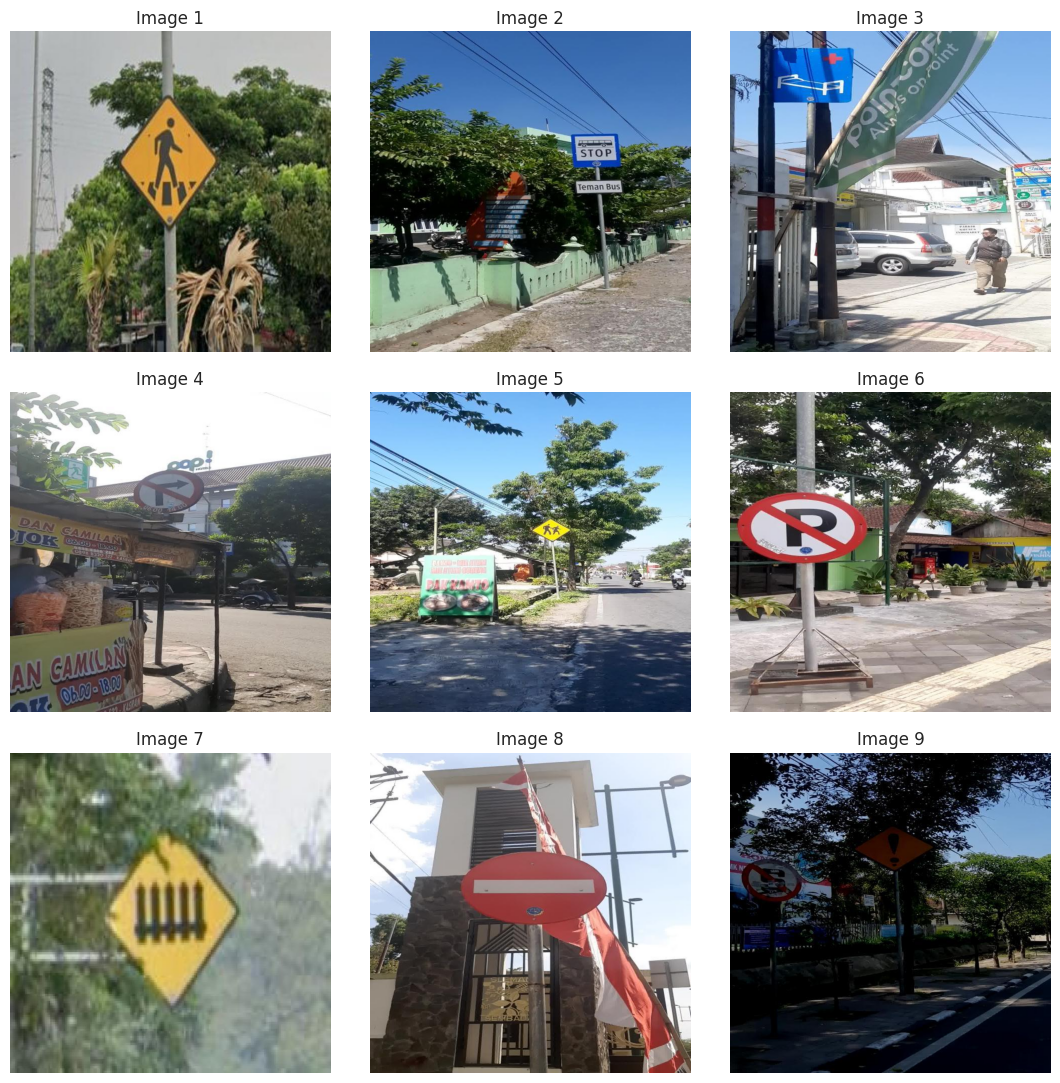

In [3]:
Image_dir = '/kaggle/input/indonesia-traffic-sign-dataset-yolov11/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Use a pretrained YOLOv11n model
model = YOLO("yolo11n.pt")

# Build from YAML and transfer weights
Final_model = YOLO('yolo11n.yaml').load('yolo11n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/indonesia-traffic-sign-dataset-yolov11/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)

100%|██████████| 5.35M/5.35M [00:00<00:00, 285MB/s]


Transferred 499/499 items from pretrained weights
Ultralytics 8.3.76 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=/kaggle/input/indonesia-traffic-sign-dataset-yolov11/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=40

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/input/indonesia-traffic-sign-dataset-yolov11/train/labels... 10714 images, 735 backgrounds, 0 corrupt: 100%|██████████| 10714/10714 [00:45<00:00, 233.13it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/indonesia-traffic-sign-dataset-yolov11/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/indonesia-traffic-sign-dataset-yolov11/valid/labels... 3085 images, 209 backgrounds, 0 corrupt: 100%|██████████| 3085/3085 [00:12<00:00, 253.81it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/indonesia-traffic-sign-dataset-yolov11/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.19G     0.8218      4.058      1.073         31        416: 100%|██████████| 168/168 [01:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


                   all       3085       2994      0.266      0.498      0.324      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.19G     0.7929      2.242      1.046         43        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]


                   all       3085       2994      0.658       0.48       0.54      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.17G     0.8618      1.882      1.076         44        416: 100%|██████████| 168/168 [00:59<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.89it/s]


                   all       3085       2994      0.469      0.442      0.415      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.19G     0.8742      1.718      1.086         36        416: 100%|██████████| 168/168 [00:59<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]


                   all       3085       2994      0.618      0.683      0.714      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.17G     0.8198      1.431      1.072         40        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]


                   all       3085       2994       0.67      0.747      0.776      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.17G     0.7669      1.197       1.05         43        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]

                   all       3085       2994      0.783      0.815      0.836      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.17G     0.7463      1.077      1.043         42        416: 100%|██████████| 168/168 [00:59<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       3085       2994      0.802      0.849      0.889      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.17G     0.7095     0.9745      1.026         49        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]


                   all       3085       2994      0.807      0.807      0.867      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.17G     0.6928     0.9036      1.027         43        416: 100%|██████████| 168/168 [00:59<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]


                   all       3085       2994      0.815      0.857      0.899      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.19G     0.6767     0.8521      1.018         47        416: 100%|██████████| 168/168 [00:59<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]

                   all       3085       2994       0.85      0.887      0.928        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.19G     0.6645     0.8046       1.01         39        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       3085       2994       0.83      0.867      0.906      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.19G      0.654     0.7832      1.009         45        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all       3085       2994       0.84        0.9       0.93      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.19G     0.6375     0.7435     0.9967         47        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all       3085       2994      0.854      0.885      0.922      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.19G     0.6245     0.7188     0.9964         40        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       3085       2994      0.892      0.921      0.941      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.19G      0.612     0.7003     0.9901         54        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       3085       2994      0.892      0.928      0.941      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.17G     0.6097     0.6829     0.9885         40        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.879      0.949      0.951      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.17G     0.6011     0.6566      0.982         47        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       3085       2994      0.911      0.959      0.959      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.19G     0.5846     0.6455      0.979         46        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       3085       2994      0.916      0.966       0.96      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.19G     0.5781     0.6306      0.974         47        416: 100%|██████████| 168/168 [01:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]

                   all       3085       2994       0.89      0.967      0.957      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.17G     0.5802     0.6262     0.9749         50        416: 100%|██████████| 168/168 [00:59<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]


                   all       3085       2994      0.893      0.941      0.951      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.19G     0.5788      0.612     0.9752         46        416: 100%|██████████| 168/168 [00:59<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       3085       2994      0.893      0.945      0.951      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.19G     0.5691     0.6047     0.9717         47        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       3085       2994      0.918      0.969      0.961      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.19G     0.5653     0.5919      0.972         41        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.08it/s]

                   all       3085       2994      0.917      0.971      0.957      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.17G     0.5588     0.5832     0.9647         52        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]


                   all       3085       2994      0.922      0.973      0.963      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.17G     0.5588     0.5786      0.968         40        416: 100%|██████████| 168/168 [00:59<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]

                   all       3085       2994      0.932      0.964       0.96      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.19G     0.5527     0.5789     0.9635         52        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all       3085       2994      0.915      0.986      0.967      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.17G     0.5484      0.567     0.9655         44        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994      0.927      0.975      0.966       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.17G     0.5445      0.552     0.9613         52        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.923       0.98      0.965      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.17G     0.5406     0.5481     0.9574         51        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]


                   all       3085       2994      0.925      0.982      0.967      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.19G     0.5389     0.5387      0.957         35        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       3085       2994      0.933      0.978      0.965      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.17G     0.5346     0.5347     0.9526         45        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       3085       2994      0.922      0.982      0.967      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.17G     0.5251     0.5228      0.951         36        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       3085       2994      0.937      0.981      0.965      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.19G     0.5277     0.5271     0.9528         47        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all       3085       2994      0.946      0.978      0.966      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.17G     0.5246     0.5084     0.9496         41        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       3085       2994      0.934      0.982      0.967      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.19G     0.5185     0.5148     0.9502         46        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all       3085       2994      0.937      0.986      0.968      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.19G     0.5179     0.5074     0.9475         51        416: 100%|██████████| 168/168 [00:59<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       3085       2994      0.935      0.987      0.968      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.19G     0.5104     0.4991     0.9454         40        416: 100%|██████████| 168/168 [00:59<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]

                   all       3085       2994      0.941      0.986       0.97      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.17G     0.5216     0.5001     0.9529         36        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.947      0.989      0.968      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.19G     0.5096     0.4972     0.9451         46        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all       3085       2994      0.947      0.986      0.969      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.17G     0.5097     0.4893     0.9441         48        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       3085       2994       0.95      0.986      0.972      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.17G     0.5056     0.4803     0.9438         43        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all       3085       2994      0.945      0.989      0.969      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.19G     0.4977     0.4825     0.9376         48        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all       3085       2994      0.949      0.989      0.971      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.17G     0.5003     0.4781     0.9375         40        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.942      0.989       0.97      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.17G     0.4916     0.4673     0.9364         39        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.948      0.991      0.972      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.17G     0.4939     0.4686     0.9401         44        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.953       0.99       0.97      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.17G     0.4887     0.4643     0.9371         42        416: 100%|██████████| 168/168 [00:59<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all       3085       2994      0.949       0.99      0.972      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.17G     0.4891     0.4594     0.9335         44        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all       3085       2994      0.952       0.99       0.97      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.17G     0.4881     0.4553     0.9354         52        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       3085       2994      0.951       0.99      0.969      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.17G      0.485     0.4566     0.9364         42        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.948       0.99       0.97      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.19G     0.4834     0.4502     0.9349         34        416: 100%|██████████| 168/168 [00:59<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       3085       2994      0.948      0.992      0.969      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.17G      0.476      0.448     0.9309         35        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       3085       2994      0.949      0.989      0.969      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.17G     0.4803     0.4464     0.9348         48        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.08it/s]

                   all       3085       2994      0.951      0.992      0.969       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.17G     0.4755     0.4404     0.9314         38        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994       0.95      0.993      0.969      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.19G     0.4726     0.4368     0.9296         53        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       3085       2994       0.95      0.993      0.969       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.17G     0.4713     0.4352     0.9276         49        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.951      0.993      0.969      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.19G      0.466     0.4309     0.9262         44        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all       3085       2994       0.95      0.994       0.97      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.19G     0.4692     0.4237     0.9295         43        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]

                   all       3085       2994       0.95      0.991       0.97      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.17G     0.4653     0.4263     0.9264         61        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994      0.952      0.991      0.969      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.19G     0.4592     0.4159     0.9241         48        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.953      0.992       0.97      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.17G     0.4608     0.4136      0.927         47        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       3085       2994      0.951      0.994       0.97      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.17G     0.4601     0.4131      0.922         42        416: 100%|██████████| 168/168 [00:59<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all       3085       2994      0.953      0.995       0.97      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.19G     0.4515     0.4092     0.9206         40        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]

                   all       3085       2994      0.953      0.995       0.97      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.17G      0.453     0.4094       0.92         41        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all       3085       2994      0.953      0.995       0.97      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.17G     0.4548     0.4075     0.9218         53        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       3085       2994      0.952      0.995       0.97      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.19G     0.4453     0.4003     0.9191         41        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994      0.953      0.995      0.971      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.17G     0.4464     0.4003     0.9174         47        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all       3085       2994      0.954      0.995      0.971      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.17G     0.4428     0.3973     0.9179         34        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all       3085       2994      0.955      0.995       0.97      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.19G     0.4413     0.3934     0.9145         36        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all       3085       2994      0.954      0.995      0.971      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.19G     0.4465     0.3939     0.9179         38        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all       3085       2994      0.954      0.995      0.971      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.17G     0.4371     0.3862      0.915         39        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.953      0.995      0.971      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.17G     0.4348     0.3842     0.9136         45        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]

                   all       3085       2994      0.953      0.995      0.971      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.19G     0.4305     0.3778     0.9106         43        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.11it/s]


                   all       3085       2994      0.952      0.995      0.972       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.17G     0.4322     0.3745     0.9121         45        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.952      0.995       0.97      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.19G     0.4274     0.3756     0.9109         49        416: 100%|██████████| 168/168 [01:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.953      0.994      0.971       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.17G     0.4259     0.3758     0.9086         44        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       3085       2994      0.954      0.995      0.972      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.17G     0.4246     0.3696     0.9109         43        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all       3085       2994      0.953      0.995      0.971      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.17G     0.4223     0.3682     0.9066         40        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994      0.955      0.995      0.972      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.19G      0.422     0.3665       0.91         34        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       3085       2994      0.955      0.995      0.973      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.19G     0.4157     0.3575     0.9059         36        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.17it/s]

                   all       3085       2994      0.955      0.995      0.973      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.17G     0.4164     0.3594     0.9088         42        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994      0.955      0.995      0.973      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.17G      0.413     0.3528     0.9055         45        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.956      0.995      0.972      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.19G     0.4106     0.3515     0.9075         38        416: 100%|██████████| 168/168 [00:59<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all       3085       2994      0.956      0.995      0.971      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.19G     0.4074     0.3512     0.9036         39        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.956      0.995      0.971      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.17G     0.4087     0.3475     0.9035         36        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all       3085       2994      0.956      0.995      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.17G     0.3989     0.3424     0.8991         46        416: 100%|██████████| 168/168 [00:59<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all       3085       2994      0.956      0.995      0.972      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.19G     0.4018     0.3384     0.9018         46        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.957      0.996      0.972      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.19G     0.4001     0.3427     0.9004         48        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       3085       2994      0.956      0.996      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.17G     0.3959     0.3373     0.8984         51        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all       3085       2994      0.956      0.996      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.19G      0.392     0.3385     0.8987         43        416: 100%|██████████| 168/168 [00:58<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all       3085       2994      0.956      0.996      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.19G     0.3895     0.3313     0.8965         34        416: 100%|██████████| 168/168 [00:58<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.13it/s]

                   all       3085       2994      0.956      0.995       0.97      0.933


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.17G     0.3083      0.232     0.8398         25        416: 100%|██████████| 168/168 [01:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994      0.956      0.995      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.17G     0.3034     0.2265     0.8382         28        416: 100%|██████████| 168/168 [00:58<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]

                   all       3085       2994      0.956      0.995      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.17G     0.2995     0.2227     0.8368         26        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.956      0.995      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.17G     0.2928     0.2196     0.8338         23        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all       3085       2994      0.956      0.995      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.17G     0.2914     0.2169     0.8329         22        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.956      0.995      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.17G     0.2877     0.2152     0.8305         27        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]

                   all       3085       2994      0.956      0.995      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.17G     0.2854     0.2122     0.8301         25        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.07it/s]

                   all       3085       2994      0.956      0.995       0.97      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.17G     0.2826     0.2104     0.8291         23        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]

                   all       3085       2994      0.956      0.995      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.17G     0.2775     0.2078     0.8252         26        416: 100%|██████████| 168/168 [00:58<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all       3085       2994      0.957      0.995      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.17G     0.2755     0.2057     0.8234         26        416: 100%|██████████| 168/168 [00:58<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]

                   all       3085       2994      0.957      0.995      0.971      0.935



100 epochs completed in 2.003 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.76 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,589,952 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:15<00:00,  1.66it/s]


                   all       3085       2994      0.957      0.995      0.971      0.934
Balai Pertolongan Pertama         67         67      0.991          1      0.995       0.99
      Banyak Anak-Anak         75         75      0.991          1      0.995      0.988
Banyak Tikungan Pertama Kanan         49         49      0.949          1      0.995      0.977
Banyak Tikungan Pertama Kiri         69         69      0.987      0.971      0.995      0.952
              Berhenti         76         76      0.992          1      0.995      0.985
  Dilarang Belok Kanan         83         83      0.985          1      0.995      0.943
   Dilarang Belok Kiri         44         47      0.959      0.998      0.994      0.873
     Dilarang Berhenti         78         79      0.976      0.987      0.995      0.978
        Dilarang Masuk         81         81      0.991          1      0.995      0.974
   Dilarang Mendahului         81         81      0.992          1      0.995      0.995
     

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [5]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

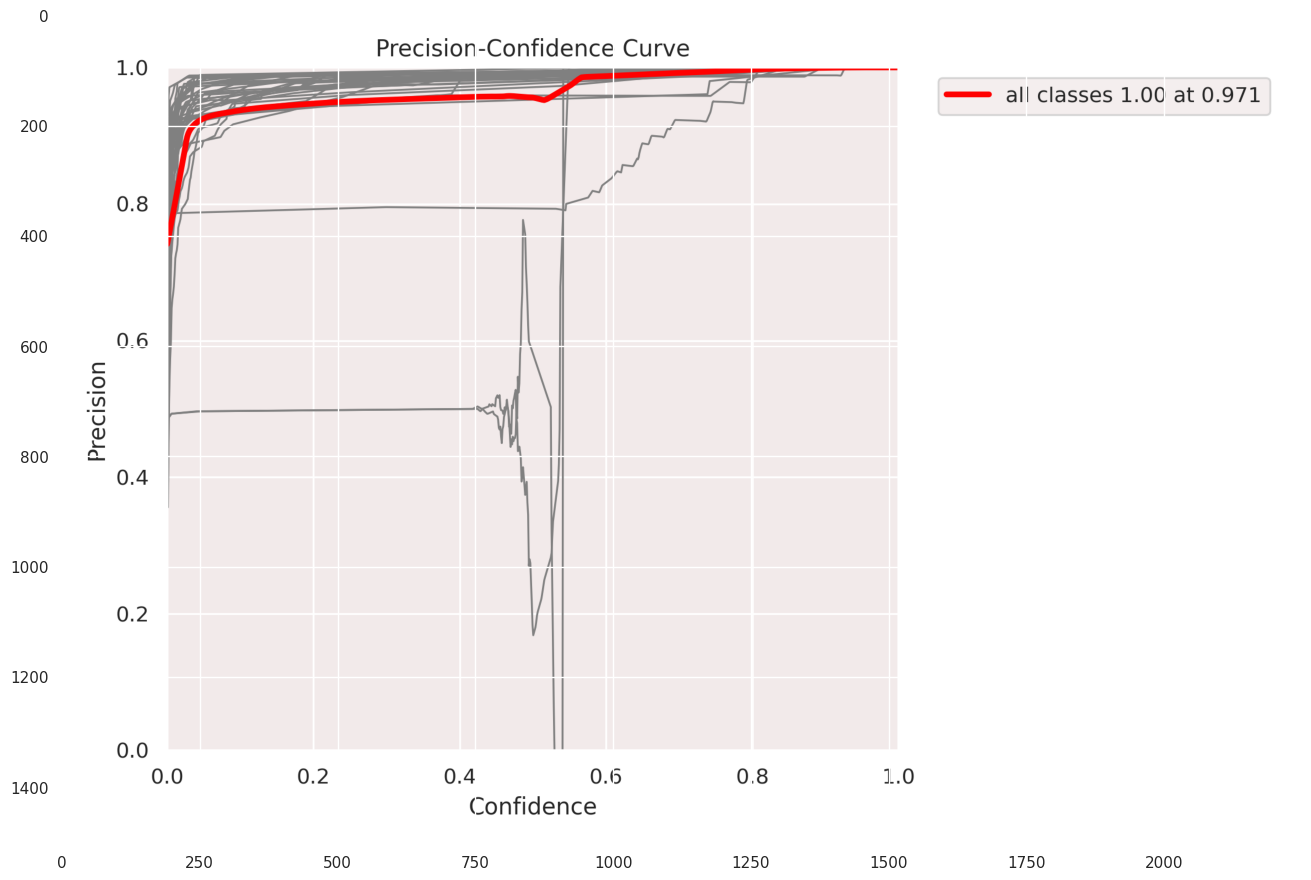

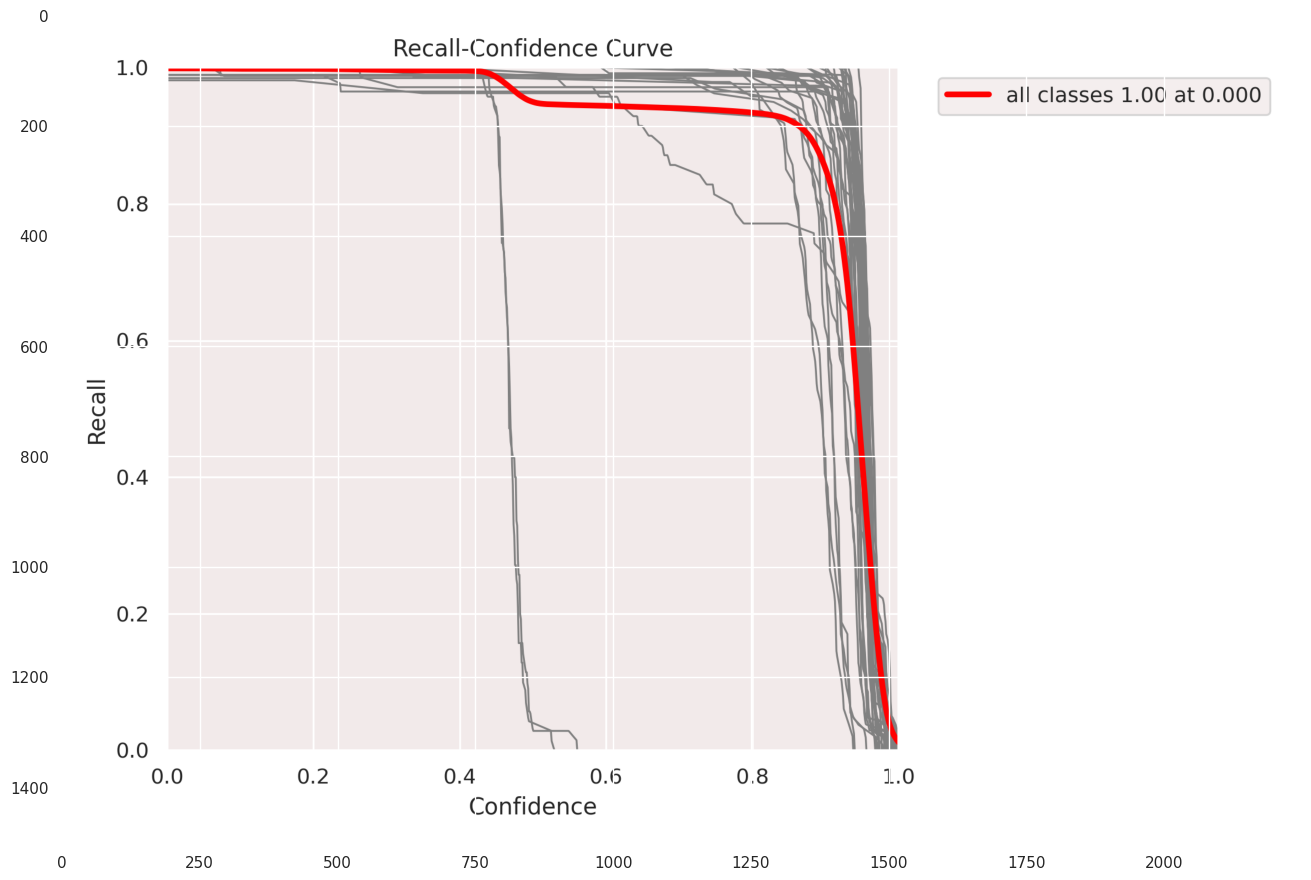

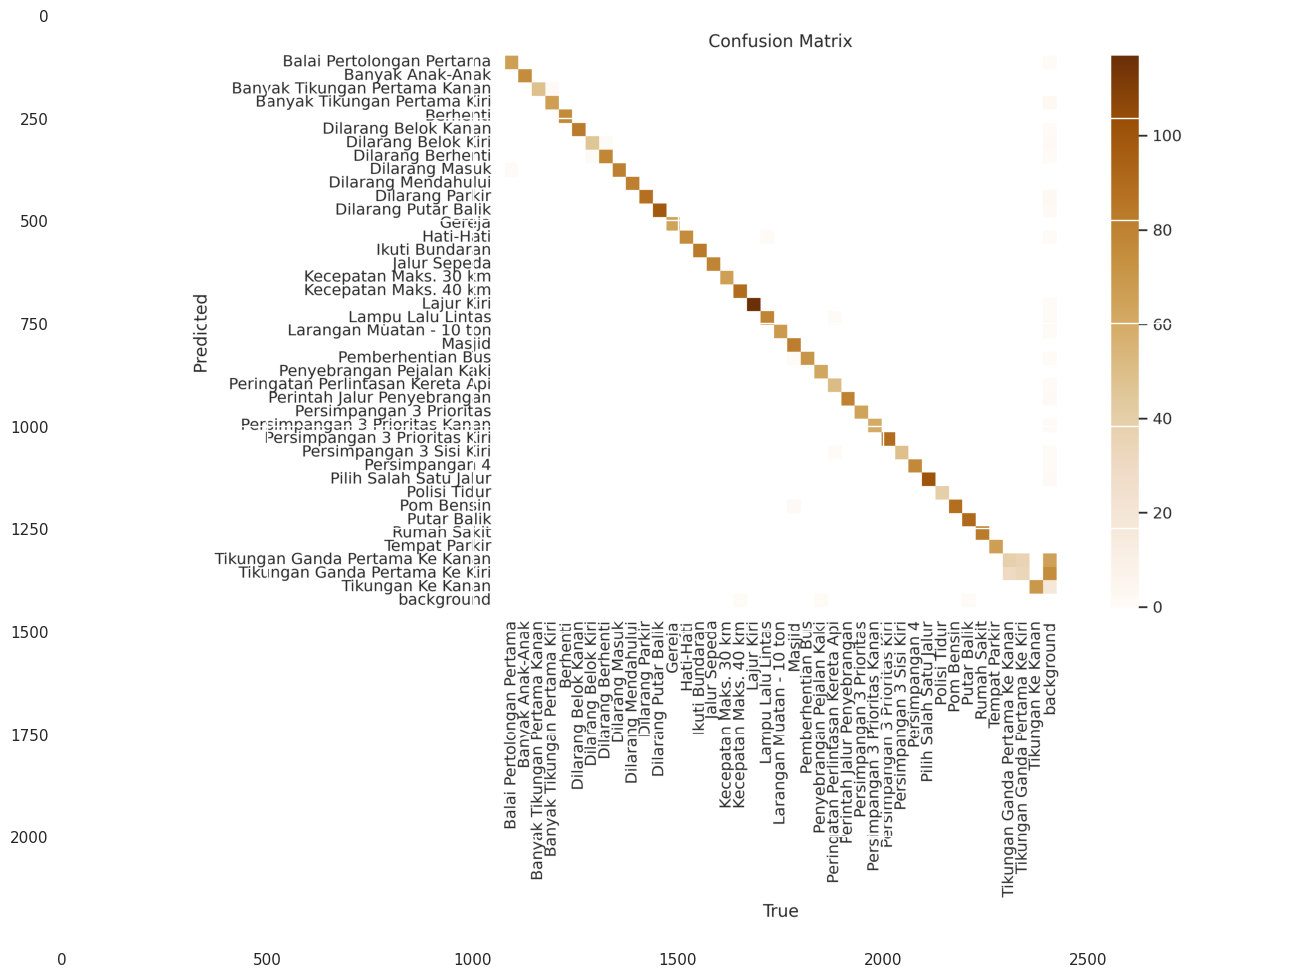

In [6]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

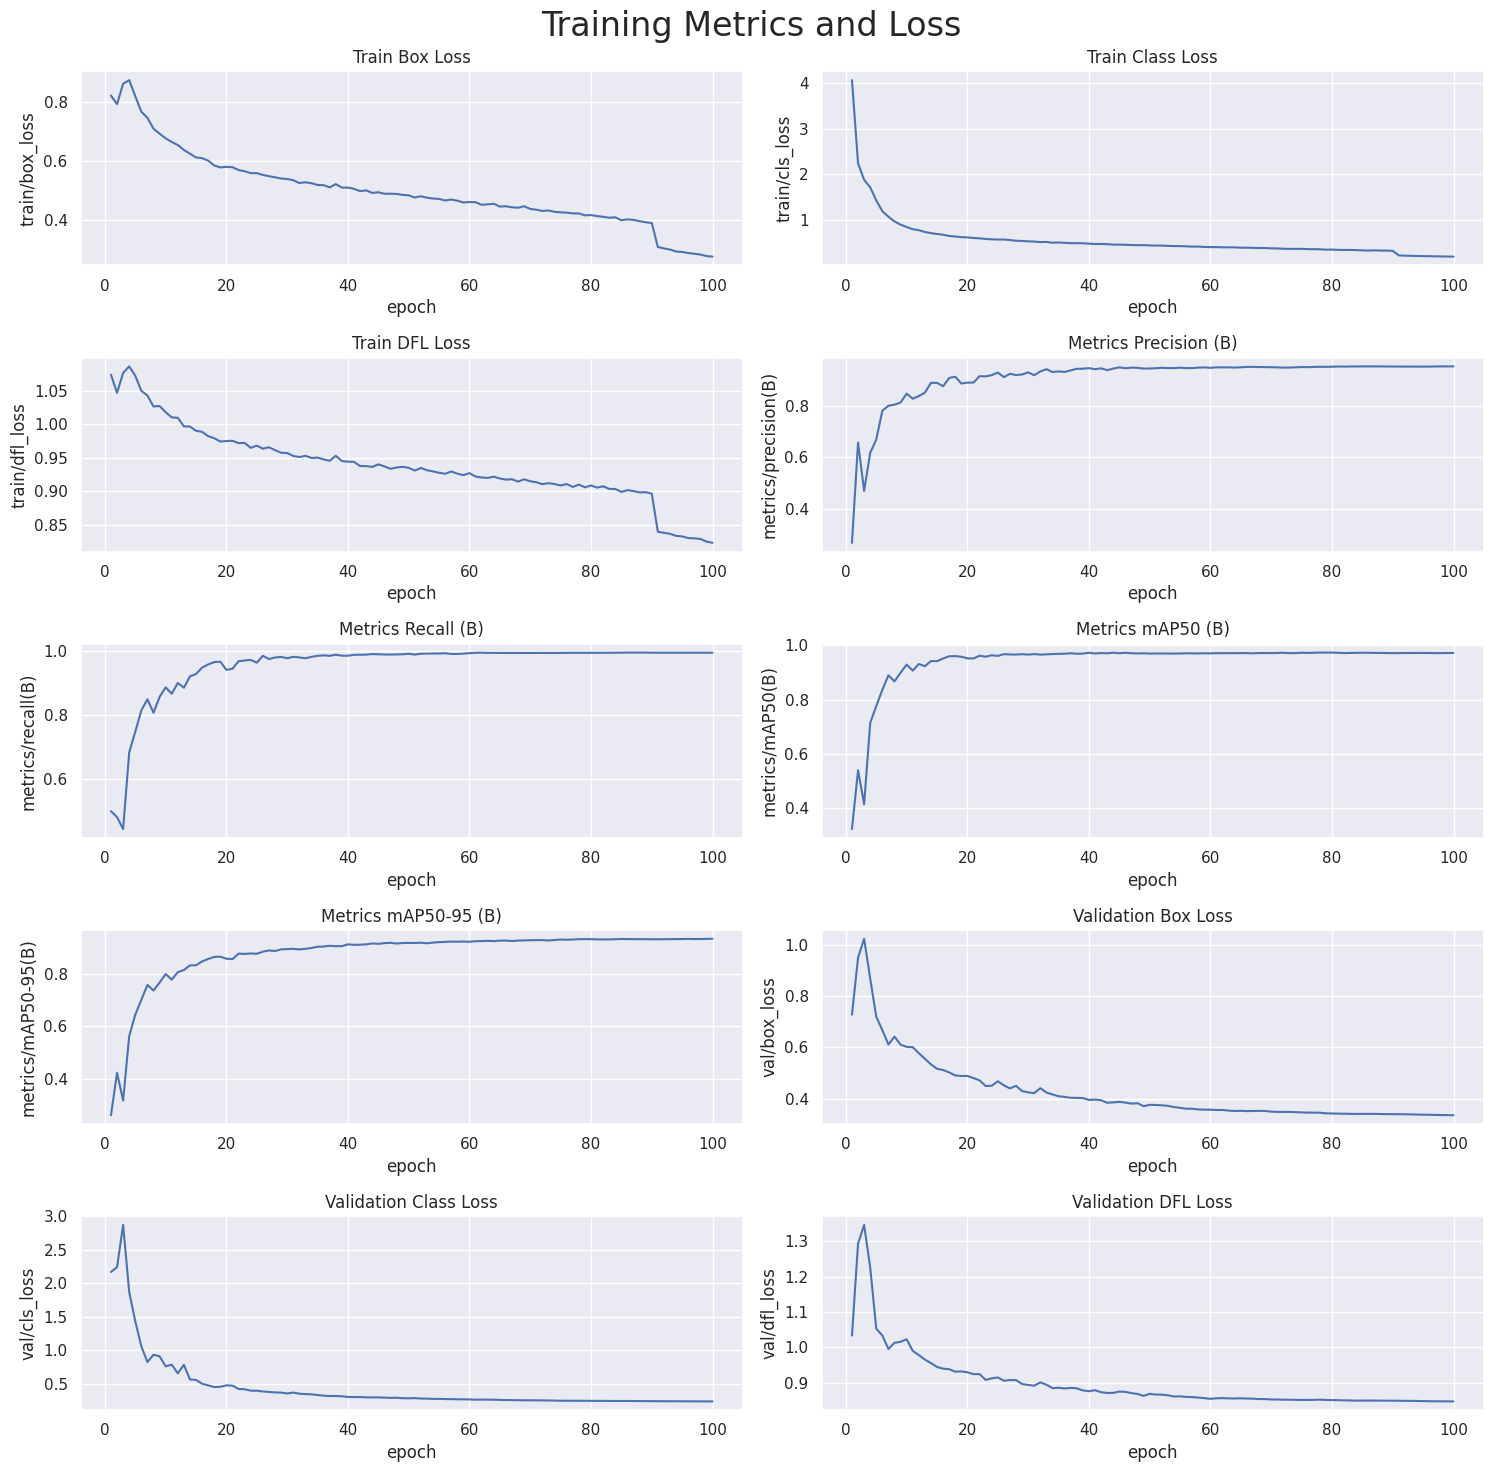

In [7]:
# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [8]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.76 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,589,952 parameters, 0 gradients, 6.4 GFLOPs


val: Scanning /kaggle/input/indonesia-traffic-sign-dataset-yolov11/test/labels... 1552 images, 91 backgrounds, 0 corrupt: 100%|██████████| 1552/1552 [00:08<00:00, 182.08it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/indonesia-traffic-sign-dataset-yolov11/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:08<00:00, 11.90it/s]


                   all       1552       1520      0.954      0.997      0.972      0.934
Balai Pertolongan Pertama         41         41      0.986          1      0.995      0.995
      Banyak Anak-Anak         36         36          1      0.995      0.995      0.992
Banyak Tikungan Pertama Kanan         24         24      0.943          1      0.993      0.974
Banyak Tikungan Pertama Kiri         35         35          1      0.994      0.995      0.957
              Berhenti         38         38      0.985          1      0.995      0.985
  Dilarang Belok Kanan         39         39      0.982          1      0.995      0.928
   Dilarang Belok Kiri         22         25      0.978          1      0.995      0.873
     Dilarang Berhenti         44         44      0.973          1      0.995      0.964
        Dilarang Masuk         41         41      0.983          1      0.995      0.977
   Dilarang Mendahului         27         27      0.978          1      0.995      0.995
     

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val


In [9]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9537552250345553
metrics/recall(B):  0.9966396473539829
metrics/mAP50(B):  0.9722677629088121
metrics/mAP50-95(B):  0.9342112479931578


In [10]:
# Path to the directory containing the images
image_dir = '/kaggle/input/indonesia-traffic-sign-dataset-yolov11/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 (no detections), 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 (no detections), 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Banyak Tikungan Pertama Kanan, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Tikungan Ke Kanan, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Hati-Hati, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Lajur Kiri, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs

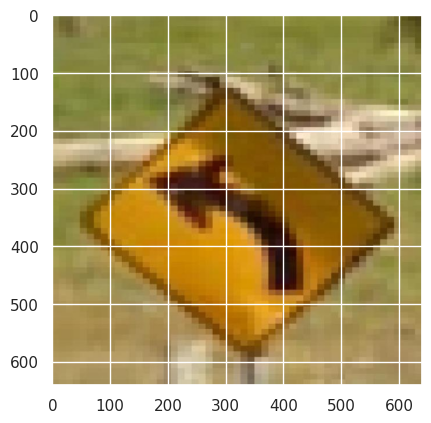

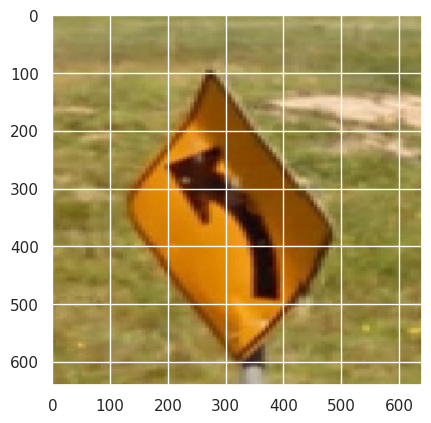

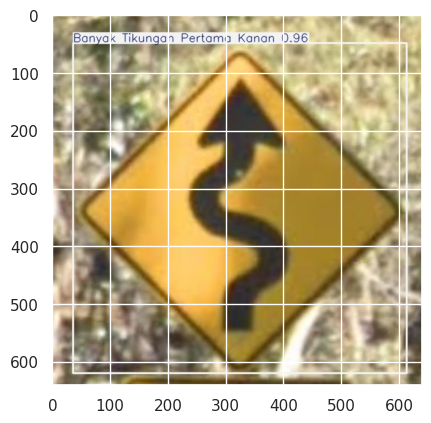

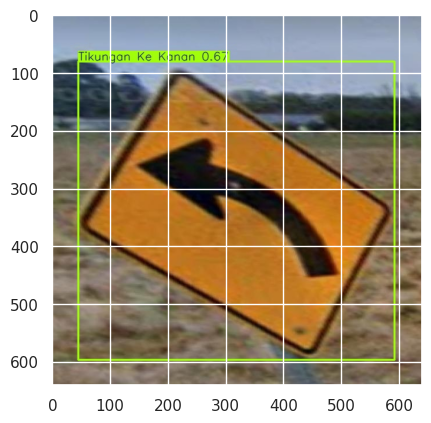

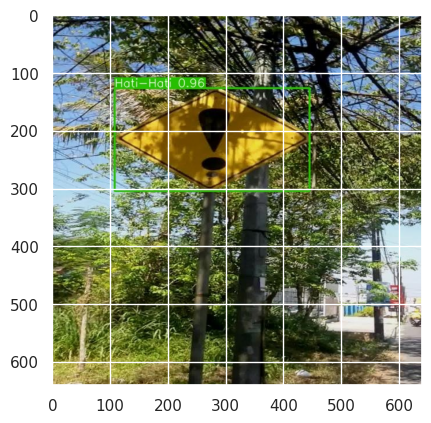

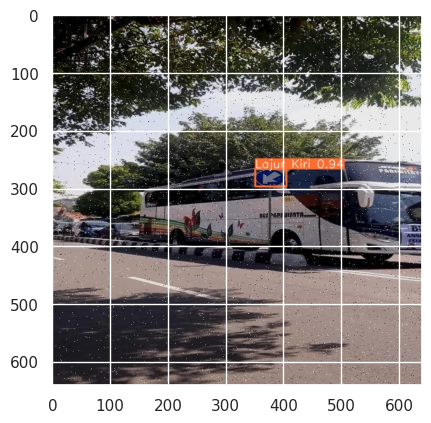

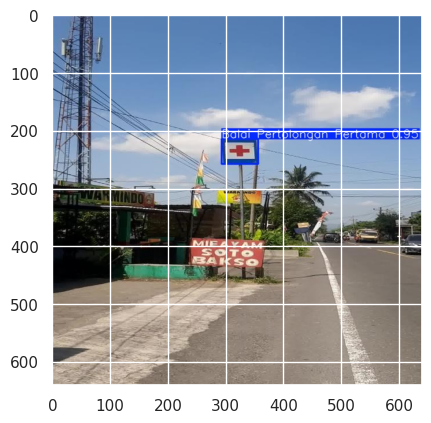

In [11]:
# View results
for i in range(2,9):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train{i}/image0.jpg'))
    plt.show()

In [12]:
import cv2
import time
#
#def limit_video_duration(input_path, output_path, duration_limit=30):
#    """Limits the duration of a video to a specified time.
#
#    Args:
#        input_path: Path to the input video file.
#        output_path: Path to save the limited video file.
#        duration_limit: Maximum duration of the video in seconds (default: 180 seconds).
#    """
#
#    cap = cv2.VideoCapture(input_path)
#    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#    fps = int(cap.get(cv2.CAP_PROP_FPS))
#
#    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
#
#    start_time = time.time()
#
#    while cap.isOpened() and (time.time() - start_time) < duration_limit:
#        ret, frame = cap.read()
#        if not ret:
#            break

#        out.write(frame)  # Write the frame directly without processing

#    cap.release()
#    out.release()

In [13]:
#input_video_path = '/content/jalanan_surabaya.mp4'
#output_video_path = '/content/limited_video.mp4'

#limit_video_duration(input_video_path, output_video_path)

In [14]:
def prediction_yolo_single_gpu(
    source: str='/kaggle/input/video-tester/test.mp4',
    weights: str='/kaggle/working/runs/detect/train/weights/best.pt',
    conf: float=0.25,
    save: bool=True,
    **kwargs
    ):

    model = YOLO(weights)

    prediction_results = model.predict(
        source=source,
        conf=conf,
        save=save,
        **kwargs
    )

    # Path of input video after prediction
    avi_path = '/kaggle/working/runs/detect/predict/result.avi'

    # Path of the output video to be compressed
    mp4_path = "/kaggle/working/result_detection_yolov11.mp4"

    # Convert .avi to .mp4 using ffmpeg
    os.system(f"ffmpeg -i {avi_path} -vcodec libx264 {mp4_path}")

    return prediction_results

prediction_results = prediction_yolo_single_gpu()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/196) /kaggle/input/video-tester/test.mp4: 256x416 1 Hati-Hati, 40.0ms
video 1/1 (frame 2/196) /kaggle/input/video-tester/test.mp4: 256x416 1 Hati-Hati, 9.2ms
video 1/1 (frame 3/196) /kaggle/input/video-tester/test.mp4: 256x416 1 Hati-Hati, 8.8ms
video 1/1 (frame 4/196) /kaggle/input/video-tester/test.mp4: 256x416 (no detections), 8.6ms
video 1/1 (frame 5/196) /kaggle/input/video-tester/test.mp4: 256x416 1 Hati-Hati, 8.7ms
video 1/1 (

In [15]:
import os
from base64 import b64encode
from IPython.display import HTML, display

# Path of input video after prediction
save_path = '/kaggle/working/runs/detect/predict/result.avi'

# Path of the output video to be compressed
compressed_path = "/kaggle/working/result_detection_yolov11.mp4"

# Kompres video menggunakan ffmpeg
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

if os.path.exists(compressed_path):
    # Read the compressed video
    with open(compressed_path, "rb") as video_file:
        video_data = video_file.read()

    # Encode video in base64 so it can be displayed in HTML
    data_url = "data:video/mp4;base64," + b64encode(video_data).decode()

    # Embed and display video on notebook
    display(HTML(f"""
    <video width="640" height="480" controls>
          <source src="{data_url}" type="video/mp4">
    </video>
    """))
else:
    print("Video file not found.")

Video file not found.
